# Quantitative Financial Analysis Using Python Programing

## Carry out in-depth investment analysis
## Build investment portfolios
## Calculate risk and return of individual securities
## Calculate risk and return of investment portfolios
## Apply best practices when working with financial data
## Use univariate and multivariate regression analysis
## Understand the Capital Asset Pricing Model (Markowitz's portfolio theory)
## Compare securities in terms of their Sharpe ratio
## Perform Monte Carlo simulations(Stock pricing, Derivatives pricing)
## Learn how to price options by applying the Black Scholes formula

In [1]:
## Then main main for an investor is to make money but it not that straight with every investment comes risk.
## how risky the investment is more gain to be expected if all goes well but if not then mean lot of loss as well.
## The topics above will be dealth with in more detail to understand and able to apply compute and predict likely outcome to minimize potential loss for an investor.

In [2]:
## First we import all the libraries we need in this study 

import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Quantitative finance is about making informed decisions that consider both dimensions, risk and return, and optimizing 
# the risk-return combination of an investment portfolio

## Calculating single asset rate of return

In [4]:
## rate of return = ending price - beginning price / beginning price   thid is a simple rate of return
## logarithmic rate of return = log ending price - log beginning price . 


## Any difference in the two returns check in lesson below when to use each of them

In [5]:
## Simple rate of returns is better used when dealing with multiple assets over the same time frame

## Log rate of returns is better used when dealing with single asset over time. 

In [6]:
## $$   simple rate of_return = \frac{p_1 - p0}{p0} = \frac{p1}{p0}-1 $$




In [7]:

## I will be using procter and Gamble (P&G) for my analysis

In [8]:
PG = wb.DataReader('PG', data_source = 'yahoo', start = '1995-1-1') ## getting my data directly from yahoo finance from 1995 till date

In [9]:
## Using the head and tail method to check our dataframe quickly

PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.320252
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.269589
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.180927
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.193593
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.168259


In [10]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-22,120.279999,118.779999,119.989998,119.400002,10261000.0,118.609001
2020-04-23,119.669998,118.050003,118.650002,119.400002,17277000.0,119.400002
2020-04-24,119.760002,118.620003,119.099998,118.779999,12751900.0,118.779999
2020-04-27,119.190002,116.900002,119.190002,117.449997,10633400.0,117.449997
2020-04-28,117.910004,116.169998,117.099998,116.889999,7301263.0,116.889999


## Simple Rate of Return

In [11]:
PG['simple_return'] = (PG['Adj Close']/PG['Adj Close'].shift(1)) - 1 # Adj Close is used as our closing price when dividend are pay
PG['simple_return']

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-04-22   -0.002340
2020-04-23    0.006669
2020-04-24   -0.005193
2020-04-27   -0.011197
2020-04-28   -0.004768
Name: simple_return, Length: 6375, dtype: float64

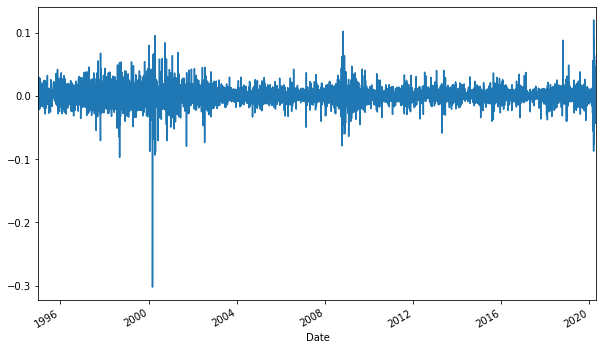

In [12]:
PG['simple_return'].plot(figsize=(10,6))
plt.show()## this graph shows daily return and this show it a time series and changes from negative to positive in a short time

In [13]:
avg_return_d = PG['simple_return'].mean()
avg_return_d          ## aberage daily return of our stock price we prefer annaul so we calculate it next 

0.0005616927968466187

In [14]:
avg_return_a = PG['simple_return'].mean()* 250 
avg_return_a          ## calculating the annual mean we multiply by 250 which is the number of trading days in a year

0.14042319921165466

In [15]:
## better to round it up nicely in percentage

print (str(round(avg_return_a, 5)*100) + '%')

14.041999999999998%


In [16]:
## Quick reminder what I said ealier on that for a single asset as the one above it quite better if we use log return than just simple return

## Log Return

In [17]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.320252,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.269589,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.180927,-0.014142
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.193593,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.168259,-0.004090


In [18]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG['log_return']

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2020-04-22   -0.002342
2020-04-23    0.006647
2020-04-24   -0.005206
2020-04-27   -0.011260
2020-04-28   -0.004779
Name: log_return, Length: 6375, dtype: float64

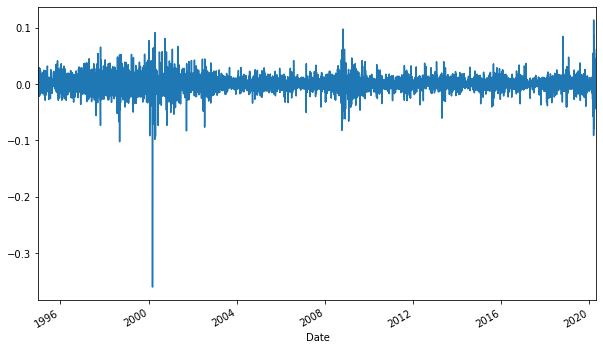

In [19]:
PG['log_return'].plot(figsize=(10,6))
plt.show()

In [20]:
log_return_d = PG['log_return'].mean()
log_return_d

0.00045771481720173555

In [21]:
log_return_a = PG['log_return'].mean()*250
log_return_a

0.11442870430043389

In [22]:
print (str(round(log_return_a, 5)* 100)+ '%')

11.443%


In [23]:
## You see we have a smaller annual return using log return. with more assets over the same time simple return is better but single
## asset log return

## Portfolio Security

In [24]:
## Great we have calculated the stock of single asset but investors rarely invest in a single assets.Having more asset can be called
## portfolio for example investing in Apple, IBM,Ford,GE we can put all this asset in a single portfolio and calculate the return.

## If the above have equally same weight in the portfolio of 0.25% then we multiply by each rate of return and we add it up to give us rate of return of the portfoilio
## Even if they do have different waeights in the portfolio it still the same calculation. Each weight multiply by each return and add them up.

## Let check this in Python

In [25]:
## Portfolio : (Procter&Gamble, Microsoft, Ford, General Electric) my chosen portfolio

In [26]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'yahoo', start = '1995-1-1')['Adj Close']

In [27]:
## quick glance at our data to check our data is clean no missing values and well organised and same structure

mydata.info()
mydata.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6375 entries, 1995-01-03 to 2020-04-28
Data columns (total 4 columns):
PG      6375 non-null float64
MSFT    6375 non-null float64
F       6375 non-null float64
GE      6375 non-null float64
dtypes: float64(4)
memory usage: 249.0 KB


,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.413537,3.200019,2.729230
1995-01-04,6.269589,2.431082,3.286119,2.729230
1995-01-05,6.180927,2.390982,3.257418,2.735919
1995-01-06,6.193593,2.431082,3.257418,2.722540
1995-01-09,6.168259,2.416045,3.314818,2.695783


In [28]:
## Normalise our data to 100 so they all begin from the same point it done below

In [29]:
mydata.iloc[0]

PG      6.320252
MSFT    2.413537
F       3.200019
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

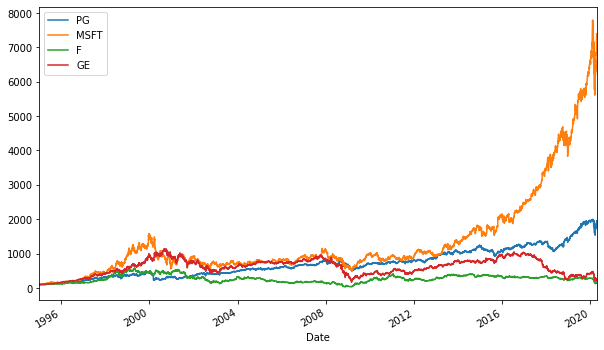

In [30]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(10,6))
plt.show()

In [31]:
## As suspected all starting from same point 100 using our iloc method in python. The graphs above shows us all the assets in portfolio
## we can see from around 2021 microsoft stock shoot up as technology was the gem of the century and both car manufacters we the poorly ones.

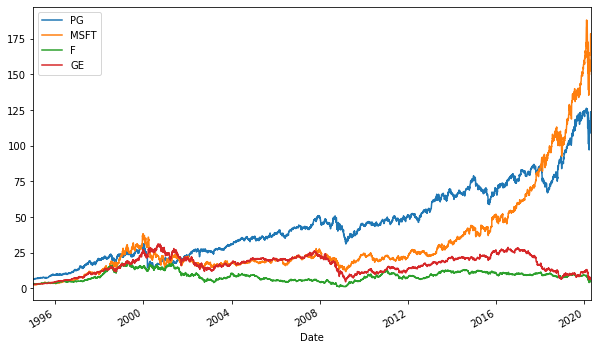

In [32]:
## Just a quick show to show how the graph will look like without the iloc method I used above

mydata.plot(figsize=(10,6))
plt.show() ## stocks have different starting point and graphs so iloc is better to normalise to the same starting point.

## Calculating the Return of a portfolio of Securities

In [33]:
returns = mydata/mydata.shift(1)-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [34]:
weights = np.array([0.25,0.25,0.25,0.25]) ## asuming all assets in the portfolio have each weights and must be equal to 1

In [35]:
annual_returns = returns.mean()*250
annual_returns

PG      0.140423
MSFT    0.216997
F       0.099624
GE      0.085086
dtype: float64

In [36]:
np.dot(annual_returns,weights) ## np.dot method it what we use to calculate the return of portfolio

0.13553270162136638

In [37]:
## make it into a nice percentage value and name this portfolio 1 
pfolio_1 = (str(round(np.dot(annual_returns,weights),3)*100) + '%')
pfolio_1 # rate of return of our portfolio is 13.5%

'13.600000000000001%'

In [38]:
## Lets make another portfolio but this time with different weights of assets in it and see if we get something different

In [39]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [40]:
annual_returns_2 = returns.mean()*250
annual_returns_2  # The same as first since we are still using the same assets

PG      0.140423
MSFT    0.216997
F       0.099624
GE      0.085086
dtype: float64

In [41]:
np.dot(annual_returns_2, weights_2)

0.16216609040059754

In [42]:
pfolio_2 =  (str(round(np.dot(annual_returns_2, weights_2),3)*100) +'%')

print (pfolio_1)
print (pfolio_2)

13.600000000000001%
16.2%


In [43]:
## Different return in portfolio with different weights in the security. We can conclude it better to have different weights rather
## than same weights in a given portfolio

## Calculating the return Of Indicies

In [44]:
## we have calcilated stock returns to measure how the company is doing. How to we know how a market is doing, well it by calculating
## the index. For example we have S&P500, DowJones, FTSE and so on.

In [45]:
tickers = ['^GSPC','^IXIC','^GDAXI','^DJI']# using S&P500, NASDAQ ,German DAX and dowJones as out market indxe
                                           # ^ this symbol indicate we dealing with market index
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = wb.DataReader(t, start = '1997-1-1', data_source = 'yahoo')['Adj Close']

In [46]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,6442.490234
1997-01-03,748.030029,1310.680054,2863.260010,6544.089844
1997-01-06,747.650024,1316.400024,2890.199951,6567.180176
1997-01-07,753.229980,1327.729980,2876.340088,6600.660156
1997-01-08,748.409973,1320.349976,2904.080078,6549.479980


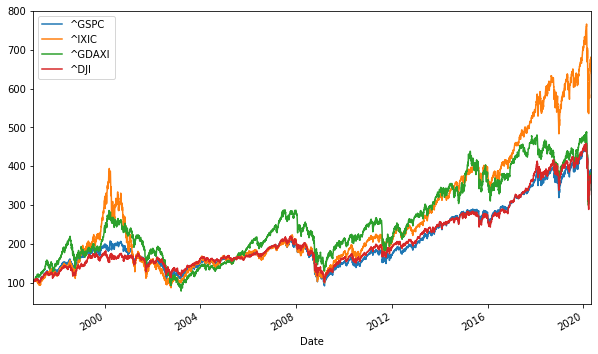

In [47]:
(ind_data/ind_data.iloc[0]*100).plot(figsize=(10,6))
plt.show()

In [48]:
## The graph above shows the four index and as we see NASDAQ(IXIC) has the best due to it represent mostly tech companies stock
## S&P500 and downjones are relatively the same throughout with German index having the second best

In [49]:
## Let calculate the returns  of these indices



In [50]:
ind_returns = (ind_data/ind_data.shift(1))-1
ind_returns

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
1997-01-02,NaN,NaN,NaN,NaN
1997-01-03,0.014952,0.023409,0.015049,0.015770
1997-01-06,-0.000508,0.004364,0.009409,0.003528
1997-01-07,0.007463,0.008607,-0.004795,0.005098
1997-01-08,-0.006399,-0.005558,0.009644,-0.007754
...,...,...,...,...
2020-04-22,0.022930,0.028094,0.016115,0.019851
2020-04-23,-0.000539,-0.000074,0.009482,0.001680
2020-04-24,0.013918,0.016454,-0.016902,0.011057


In [51]:
annual_ind_returns = ind_returns.mean()*250
annual_ind_returns

^GSPC     0.077256
^IXIC     0.113083
^GDAXI    0.070026
^DJI      0.074123
dtype: float64

## Let compare a stock with the market

In [52]:
tickers = ['PG','^GSPC','^DJI']
ind_data_2 = pd.DataFrame()
for t in tickers:
    ind_data_2[t] = wb.DataReader(t, start = '1997-1-1', data_source = 'yahoo')['Adj Close']

In [53]:
ind_data_2.head()

,PG,^GSPC,^DJI
Date,,,
1997-01-02,12.734653,737.010010,6442.490234
1997-01-03,12.943666,748.030029,6544.089844
1997-01-06,13.033240,747.650024,6567.180176
1997-01-07,13.272111,753.229980,6600.660156
1997-01-08,13.033240,748.409973,6549.479980


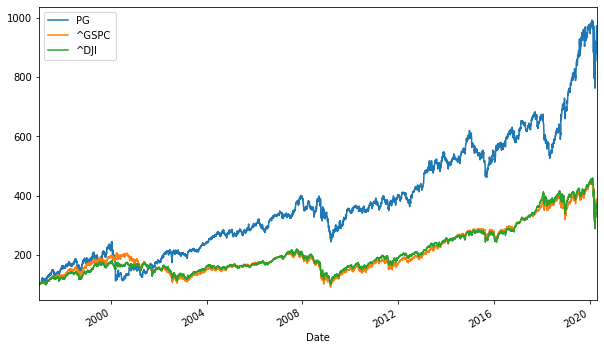

In [54]:
(ind_data_2/ind_data_2.iloc[0]*100).plot(figsize=(10,6))
plt.show()

In [55]:
# The graph above showed P&G did very good in the market.

## Security RIsk Measure and  Forecast

In [56]:
## Every investors want to have high returns on their investment so they need to know how risk is measured and what risk they exposed to

In [57]:
## Variance and Standard deviaition are used to quantify risk 

In [58]:
tickers = ['PG','BEI.DE'] # Will be using two security our P&G and german Beiersdorf to calculate risk.
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = wb.DataReader(t, start = '2010-1-1', data_source = 'yahoo')['Adj Close']

In [59]:
sec_data.tail()

,PG,BEI.DE
Date,,
2020-04-22,118.609001,95.940002
2020-04-23,119.400002,95.379997
2020-04-24,118.779999,94.779999
2020-04-27,117.449997,94.440002
2020-04-28,116.889999,94.900002


In [60]:
sec_returns = np.log(sec_data/sec_data.shift(1))
sec_returns

,PG,BEI.DE
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,-0.005289
2010-01-06,-0.004755,-0.000758
2010-01-07,-0.005438,-0.010124
2010-01-08,-0.001323,-0.029309
...,...,...
2020-04-22,-0.002342,0.000626
2020-04-23,0.006647,-0.005854
2020-04-24,-0.005206,-0.006310


In [61]:
## Standard deviaition can also be call a risk or volatility . If the stock returns deviates alot from the mean it said to be volatile
## We calculate each stock seperately

## PG

In [62]:
sec_returns['PG'].mean()

0.0003758506895088084

In [63]:
sec_returns['PG'].mean()*250 ## annula returns

0.0939626723772021

In [64]:
sec_returns['PG'].std() # standard deviaiiton or volatility

0.010831817714367139

In [65]:
sec_returns['PG'].std()*250**0.5 ## annual STD

0.1712660758857966

## Beiersdorf

In [66]:
sec_returns['BEI.DE'].mean()

0.00033940795408199983

In [67]:
sec_returns['BEI.DE'].mean()*250

0.08485198852049995

In [68]:
sec_returns['BEI.DE'].std()

0.012145292257775652

In [69]:
sec_returns['BEI.DE'].std()*250**0.5

0.1920339319148996

In [70]:
print(sec_returns['PG'].mean()*250)
print(sec_returns['BEI.DE'].mean()*250)

0.0939626723772021
0.08485198852049995


In [71]:
sec_returns[['PG','BEI.DE']].mean()*250 # Another way of finding the mean a short cut
# We use double bracket to make an array as we have two stock.

PG        0.093963
BEI.DE    0.084852
dtype: float64

In [72]:
sec_returns[['PG','BEI.DE']].std()*250**0.5 

PG        0.171266
BEI.DE    0.192034
dtype: float64

In [73]:
## The figures above shows Beiersdorf have more rate of return there by higher standard deviaition as it risker .

## Benefit of Portfolio and Diversification

In [74]:
## In a good economy almost all company in any sector will do well as people have money to spend more.
## In this Covid-19 no one wants to buy a car now instead people will want to buy gorcery item instead so imgaine a portfolio with just
## just car stocks will lose alot in this time but a portfolio involving mix of car and walmart or tesco. Walmart or tesco will 
## help the portfolio in this time as people are panicking to buy there by revenue increase even in adverse econonmy

In [75]:
## Correlation and covaraince will be calculated to see the relatoship between them


## Covariance and Correlation

In [76]:
PG_var = sec_returns['PG'].var()
PG_var

0.00011732827499727774

In [77]:
BEI_var = sec_returns['BEI.DE'].var()
BEI_var

0.00014750812402678518

In [78]:
PG_var_a = sec_returns['PG'].var()*250
PG_var_a

0.029332068749319436

In [79]:
BEI_var_a = sec_returns['BEI.DE'].var()*250
BEI_var_a

0.036877031006696294

In [80]:
##  I have used two methods the method above is a longer way just wanted to show how good it is to use the .cov() method in python to get quick answer
## As you see PG_var_a is the same as in our matrix 0.029331 the same applies to Beiersdof of 0.036877

In [81]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000117,0.000035
BEI.DE,0.000035,0.000148


In [82]:
cov_matrix_a = sec_returns.cov()*250 ## annual covariance  matrix.
cov_matrix_a

,PG,BEI.DE
PG,0.029332,0.008784
BEI.DE,0.008784,0.036877


In [83]:
corr_matrix = sec_returns.corr()
corr_matrix  ## 

,PG,BEI.DE
PG,1.00000,0.26764
BEI.DE,0.26764,1.00000


In [84]:
## KEY TAKEAWAYS

##Covariance is a statistical tool investors use to measure the relationship between the movement of two asset prices.
## A positive covariance means asset prices are moving in the same general direction.
##A negative covariance means asset prices are moving in opposite directions.
##Investors using modern portfolio theory (MPT) seek to optimize returns by including assets in their portfolio that have a negative covariance.
## Covariance helps investors create a portfolio that includes a mix of distinct asset types, thus employing a diversification strategy to reduce risk.

## Calculating Portfolio Risk

####  Equal weigthing scheme:

In [85]:
weights = np.array([0.5,0.5]) ## weights for our P&G and BEI>DE stocks

##### Portfolio Variance:

In [86]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov()*250,weights))
pfolio_var

0.0209442159798691

#### Portfolio Volatility

In [87]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov()*250,weights)))**0.5
pfolio_vol

0.14472116631601992

In [88]:
print (str(round(pfolio_vol, 5)*100)+ '%')

14.472%


# Markowitz Portfolio Theory

### Obtaining the Efficient Frontier

In [89]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2003-1-1')['Adj Close']

In [90]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-04-22,118.609001,2799.310059
2020-04-23,119.400002,2797.800049
2020-04-24,118.779999,2836.739990
2020-04-27,117.449997,2878.479980
2020-04-28,116.889999,2863.389893


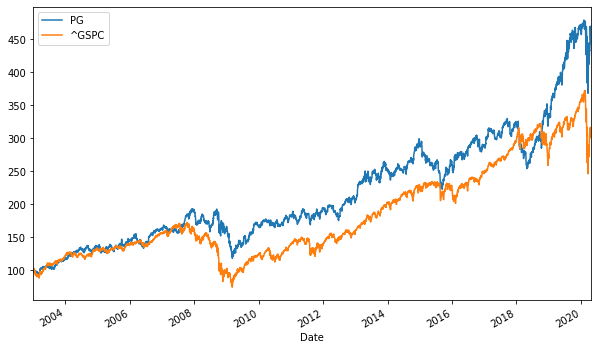

In [91]:
(pf_data/pf_data.iloc[0]*100).plot(figsize = (10,6))

In [92]:
log_returns = np.log(pf_data/pf_data.shift(1))
log_returns

C:\Users\Knowhow\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,PG,^GSPC
Date,,
2003-01-02,NaN,NaN
2003-01-03,-0.010992,-0.000484
2003-01-06,0.011334,0.022226
2003-01-07,-0.015488,-0.006566
2003-01-08,-0.015028,-0.014186
...,...,...
2020-04-22,-0.002342,0.022671
2020-04-23,0.006647,-0.000540
2020-04-24,-0.005206,0.013822


In [94]:
log_returns.mean()*250

PG       0.085419
^GSPC    0.065805
dtype: float64

In [96]:
log_returns.cov()*250

,PG,^GSPC
PG,0.031935,0.021751
^GSPC,0.021751,0.036855


In [97]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.634027
^GSPC,0.634027,1.000000


In [98]:
## All this calculation above are what we done ealier 

In [100]:
num_assets = len(assets)
num_assets ## since we have only 2 assets we use the len method and make an object call num_assets

2

In [105]:
arr = np.random.random(2)
arr ## generating 2 randoming number that will equal to 1 when added

array([0.45862955, 0.39283796])

In [107]:
arr[0] + arr[1] # we have to run this so many time to get one so next step give us good way to generate it quick

0.8514675076953448

In [108]:
weights = np.random.random(num_assets)
weights /=np.sum(weights)
weights  ## the theory behind this is for another story

array([0.30542452, 0.69457548])

In [109]:
weights[0] + weights[1] ## we should get one with first try

1.0

### Expected Portfolio Return

In [112]:
np.sum(weights * log_returns.mean()) * 250

0.07179598907281855

### Expected Portfolio Variance:

In [113]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.029988096720615955

### Expected Portfolio Volatility

In [114]:

np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights)))

0.1731707155399433

In [116]:
pfolio_returns = []
pfolio_vol = [] ## we creat empty list we will fill it 1000 loop og generated 

for x in range (1000):  ## we are computing 1000 combination to check the best effeicent portfolio
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean())*250)
    pfolio_vol.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))
    
pfolio_returns, pfolio_vol    

([0.06964963760769183,
  0.08432182474437533,
  0.08480223873906363,
  0.07477936787578399,
  0.06866880431497725,
  0.07484850418910505,
  0.07551963450731347,
  0.08028599239269021,
  0.07751898655718542,
  0.0805795164049353,
  0.0748411324100975,
  0.06945460010177976,
  0.08448203353510306,
  0.07833597898199879,
  0.06801990267600422,
  0.06753321417665091,
  0.07173107902396383,
  0.07989720898747787,
  0.07668469409911959,
  0.072461995321106,
  0.07578893064506462,
  0.0746545772944943,
  0.07290997151184338,
  0.07777099918757885,
  0.06729731089281198,
  0.08420350214924695,
  0.0851115704584486,
  0.07712857306081494,
  0.07706774791389219,
  0.06879461608811115,
  0.0689974566704847,
  0.07686050406237176,
  0.06969248426406262,
  0.07305373881708922,
  0.07590036754379502,
  0.07369855468879194,
  0.06788278560456691,
  0.07208221710082292,
  0.07502785329644066,
  0.07735318996081371,
  0.07687644417688648,
  0.07163460856765617,
  0.08312500337510087,
  0.06693840294387

In [119]:
pfolio_returns = []
pfolio_vol = [] 

for x in range (1000):  
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean())*250)
    pfolio_vol.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))
    
pfolio_returns = np.array(pfolio_returns) ## converting the above to an array
pfolio_vol = np.array(pfolio_vol)

pfolio_returns, pfolio_vol
    
  

(array([0.08326367, 0.07321767, 0.08001187, 0.07556814, 0.07758126,
        0.07978222, 0.077994  , 0.07383556, 0.08145777, 0.07794651,
        0.08504696, 0.07409972, 0.07634572, 0.07658683, 0.08159846,
        0.07892291, 0.08140908, 0.07195435, 0.06694052, 0.06926276,
        0.08043515, 0.07598078, 0.07746297, 0.06821445, 0.07926222,
        0.07399132, 0.07587606, 0.07375874, 0.08083916, 0.08059524,
        0.07722868, 0.07364131, 0.07901786, 0.07279648, 0.08391919,
        0.08072421, 0.07432417, 0.07554723, 0.07105798, 0.07044048,
        0.07480713, 0.06823977, 0.07196697, 0.0675191 , 0.07140996,
        0.07386984, 0.06960233, 0.06928237, 0.08327246, 0.06688386,
        0.0844404 , 0.07486552, 0.07755602, 0.07512083, 0.0789374 ,
        0.07200167, 0.07476962, 0.07426323, 0.08351877, 0.08041537,
        0.08179304, 0.07682122, 0.06914566, 0.07285902, 0.07404627,
        0.0802327 , 0.07642866, 0.08198651, 0.07730155, 0.07231091,
        0.08240084, 0.07631174, 0.07637697, 0.07

In [120]:
## we will plot the effeicient frontier first creating a dataframe


In [121]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_vol})

In [122]:
portfolios.head()

,Return,Volatility
0,0.083264,0.173210
1,0.073218,0.170444
2,0.080012,0.168053
3,0.075568,0.167584
4,0.077581,0.166835


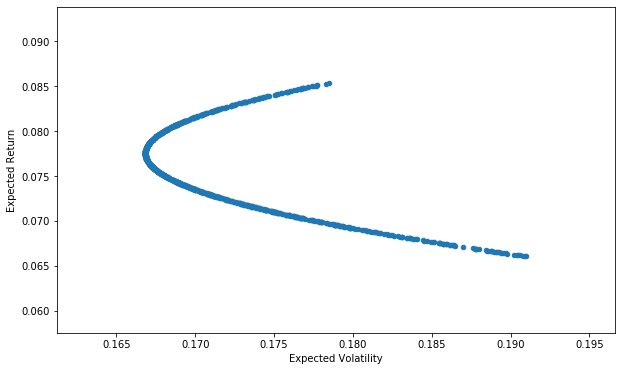

In [127]:
portfolios.plot(x='Volatility', y='Return',kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()